Promedio de las medidas por especie:
                  sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026

Distancias Manhattan entre especies:
 [[0.    5.456 7.896]
 [5.456 0.    2.848]
 [7.896 2.848 0.   ]]

Distancias Euclidianas entre especies:
 [[0.         3.20517457 4.75259171]
 [3.20517457 0.         1.62048882]
 [4.75259171 1.62048882 0.        ]]


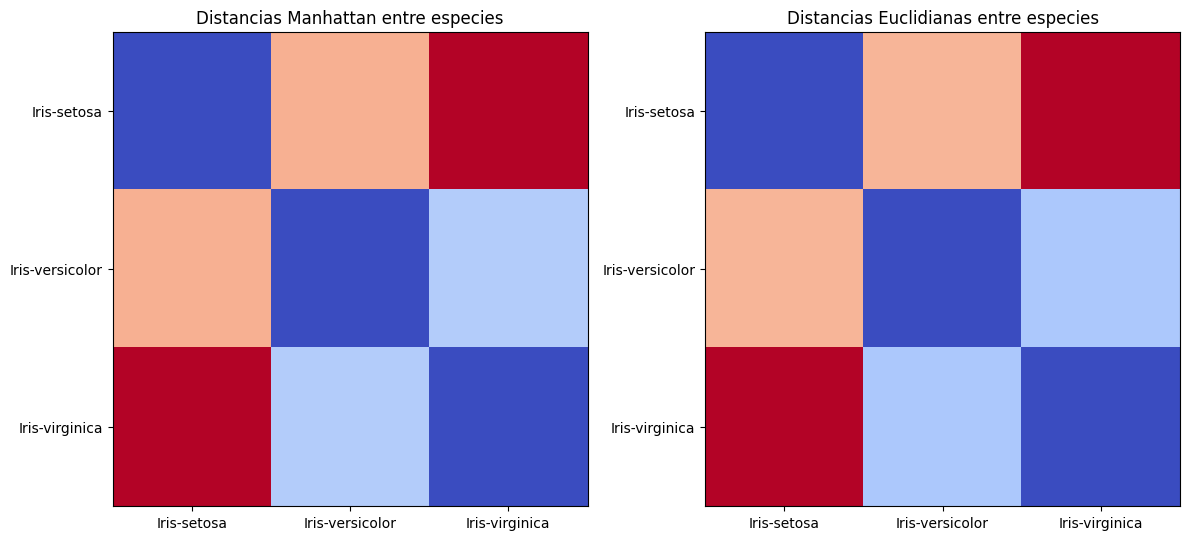

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Cargar el dataset de iris
iris = pd.read_csv("iris.data", header=None)

# Asignar nombres de columnas
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# 1. Calcular el promedio de las medidas de las flores de cada especie
species_means = iris.groupby('species').mean()
print("Promedio de las medidas por especie:\n", species_means)

# 2. Calcular distancias Manhattan y Euclidianas entre cada par de promedios
# Convertir los promedios en un array NumPy para facilitar el cálculo de distancias
means_array = species_means.values

# Calcular distancias Manhattan
manhattan_distances = cdist(means_array, means_array, metric='cityblock')
print("\nDistancias Manhattan entre especies:\n", manhattan_distances)

# Calcular distancias Euclidianas
euclidean_distances = cdist(means_array, means_array, metric='euclidean')
print("\nDistancias Euclidianas entre especies:\n", euclidean_distances)

# 3. Graficar las distancias
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Mapa de calor para distancias Manhattan
ax[0].imshow(manhattan_distances, cmap='coolwarm')
ax[0].set_title('Distancias Manhattan entre especies')
ax[0].set_xticks(np.arange(len(species_means.index)))
ax[0].set_yticks(np.arange(len(species_means.index)))
ax[0].set_xticklabels(species_means.index)
ax[0].set_yticklabels(species_means.index)

# Mapa de calor para distancias Euclidianas
ax[1].imshow(euclidean_distances, cmap='coolwarm')
ax[1].set_title('Distancias Euclidianas entre especies')
ax[1].set_xticks(np.arange(len(species_means.index)))
ax[1].set_yticks(np.arange(len(species_means.index)))
ax[1].set_xticklabels(species_means.index)
ax[1].set_yticklabels(species_means.index)

# Mostrar los gráficos
plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


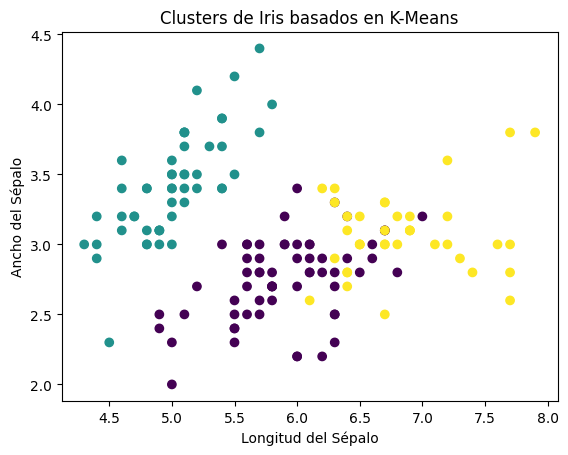

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Preparar los datos (sin la columna de especies)
X = iris.drop(columns=['species'])

# Aplicar K-Means con 3 clusters (ya que conocemos que hay 3 especies)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Etiquetas de los clusters asignados
clusters = kmeans.labels_

# Graficar para ver cómo quedaron los clusters
plt.scatter(X['sepal_length'], X['sepal_width'], c=clusters, cmap='viridis')
plt.title('Clusters de Iris basados en K-Means')
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Ancho del Sépalo')
plt.show()
